#### Import Packages

In [60]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#### Import Data

In [61]:
data = 'data\data_hep - data_hep.csv'

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\Darsh\AppData\Local\Temp\ipykernel_14392\3868482172.py:1: SyntaxWarning: invalid escape sequence '\d'
  data = 'data\data_hep - data_hep.csv'


In [62]:
df = pd.read_csv(data) # 70606 rows × 61 columns

# get the headers
headers = df.columns.tolist()

headers


['index',
 'R2',
 'thrustBm',
 'thrustOm',
 'cosTBTO',
 'cosTBz',
 'KSFWVariables__boet__bc',
 'KSFWVariables__bomm2__bc',
 'CleoConeCS__bo1__bc',
 'CleoConeCS__bo2__bc',
 'CleoConeCS__bo3__bc',
 'CleoConeCS__bo4__bc',
 'CleoConeCS__bo5__bc',
 'CleoConeCS__bo6__bc',
 'CleoConeCS__bo7__bc',
 'CleoConeCS__bo8__bc',
 'CleoConeCS__bo9__bc',
 'CleoConeCS__bo1__cmROE__bc',
 'CleoConeCS__bo2__cmROE__bc',
 'CleoConeCS__bo3__cmROE__bc',
 'CleoConeCS__bo4__cmROE__bc',
 'CleoConeCS__bo5__cmROE__bc',
 'CleoConeCS__bo6__cmROE__bc',
 'CleoConeCS__bo7__cmROE__bc',
 'CleoConeCS__bo8__cmROE__bc',
 'CleoConeCS__bo9__cmROE__bc',
 'KSFWVariables__bohso00__bc',
 'KSFWVariables__bohso02__bc',
 'KSFWVariables__bohso04__bc',
 'KSFWVariables__bohso10__bc',
 'KSFWVariables__bohso12__bc',
 'KSFWVariables__bohso14__bc',
 'KSFWVariables__bohso20__bc',
 'KSFWVariables__bohso22__bc',
 'KSFWVariables__bohso24__bc',
 'KSFWVariables__bohoo0__bc',
 'KSFWVariables__bohoo1__bc',
 'KSFWVariables__bohoo2__bc',
 'KSFWVariabl

-----------------

### Correlation Matrix

$$ρ_{ij} = \frac{Cov(X_i, X_j)}{σ_{X_i} σ_{X_j}}$$

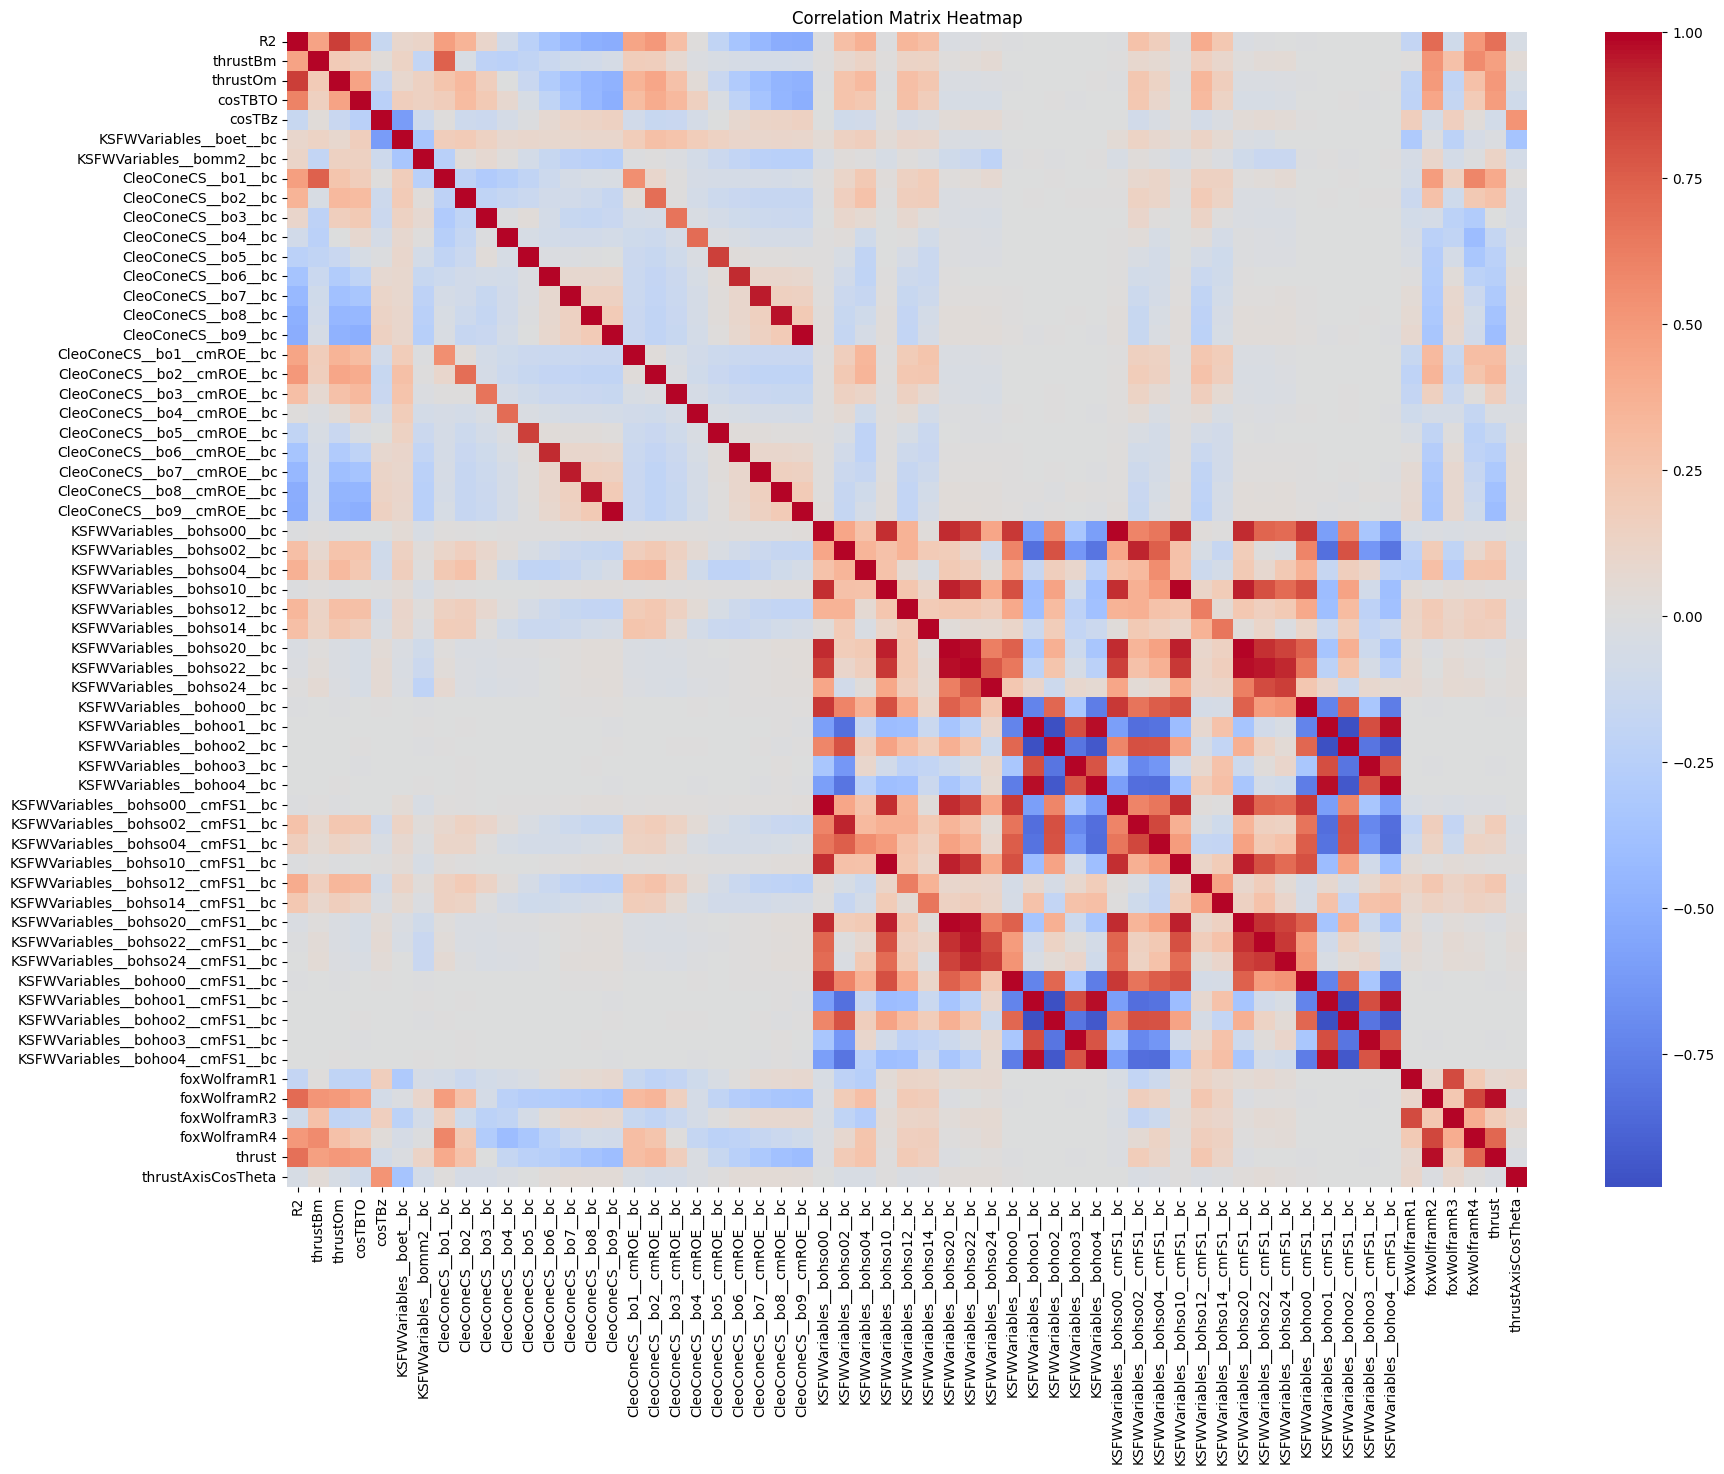

In [63]:
features = df.drop(columns=['index', 'type'])
corr_matrix = features.corr()

plt.figure(figsize=(20, 15))
sns.heatmap(corr_matrix, cmap="coolwarm", center=0)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [64]:
# Too long DONT USE

# pd.plotting.scatter_matrix(features, figsize=(20, 20))
# plt.show()


In [65]:
corr_pairs = corr_matrix.unstack().sort_values(ascending=False)
corr_pairs = corr_pairs[corr_pairs < 1]

high_corr = corr_pairs[abs(corr_pairs) > 0.9]

print(high_corr)

KSFWVariables__bohoo0__cmFS1__bc   KSFWVariables__bohoo0__bc            1.00000
KSFWVariables__bohoo0__bc          KSFWVariables__bohoo0__cmFS1__bc     1.00000
KSFWVariables__bohso00__cmFS1__bc  KSFWVariables__bohso00__bc           1.00000
KSFWVariables__bohso00__bc         KSFWVariables__bohso00__cmFS1__bc    1.00000
KSFWVariables__bohso20__bc         KSFWVariables__bohso20__cmFS1__bc    1.00000
                                                                         ...   
KSFWVariables__bohoo1__bc          KSFWVariables__bohoo2__cmFS1__bc    -0.97784
KSFWVariables__bohoo1__cmFS1__bc   KSFWVariables__bohoo2__bc           -0.97784
KSFWVariables__bohoo1__bc          KSFWVariables__bohoo2__bc           -0.97784
KSFWVariables__bohoo2__bc          KSFWVariables__bohoo1__cmFS1__bc    -0.97784
                                   KSFWVariables__bohoo1__bc           -0.97784
Length: 78, dtype: float64


In [66]:
# Correlation matrix
corr_matrix = features.corr().abs()

# Upper triangle (ignore duplicate pairs)
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Drop features with correlation > 0.9
to_drop = [column for column in upper.columns if any(upper[column] > 0.8)]
print("Highly correlated features to drop:", to_drop)


reduced_features = features.drop(columns=to_drop)

Highly correlated features to drop: ['thrustOm', 'CleoConeCS__bo5__cmROE__bc', 'CleoConeCS__bo6__cmROE__bc', 'CleoConeCS__bo7__cmROE__bc', 'CleoConeCS__bo8__cmROE__bc', 'CleoConeCS__bo9__cmROE__bc', 'KSFWVariables__bohso10__bc', 'KSFWVariables__bohso20__bc', 'KSFWVariables__bohso22__bc', 'KSFWVariables__bohoo0__bc', 'KSFWVariables__bohoo1__bc', 'KSFWVariables__bohoo2__bc', 'KSFWVariables__bohoo3__bc', 'KSFWVariables__bohoo4__bc', 'KSFWVariables__bohso00__cmFS1__bc', 'KSFWVariables__bohso02__cmFS1__bc', 'KSFWVariables__bohso04__cmFS1__bc', 'KSFWVariables__bohso10__cmFS1__bc', 'KSFWVariables__bohso20__cmFS1__bc', 'KSFWVariables__bohso22__cmFS1__bc', 'KSFWVariables__bohso24__cmFS1__bc', 'KSFWVariables__bohoo0__cmFS1__bc', 'KSFWVariables__bohoo1__cmFS1__bc', 'KSFWVariables__bohoo2__cmFS1__bc', 'KSFWVariables__bohoo3__cmFS1__bc', 'KSFWVariables__bohoo4__cmFS1__bc', 'foxWolframR3', 'foxWolframR4', 'thrust']


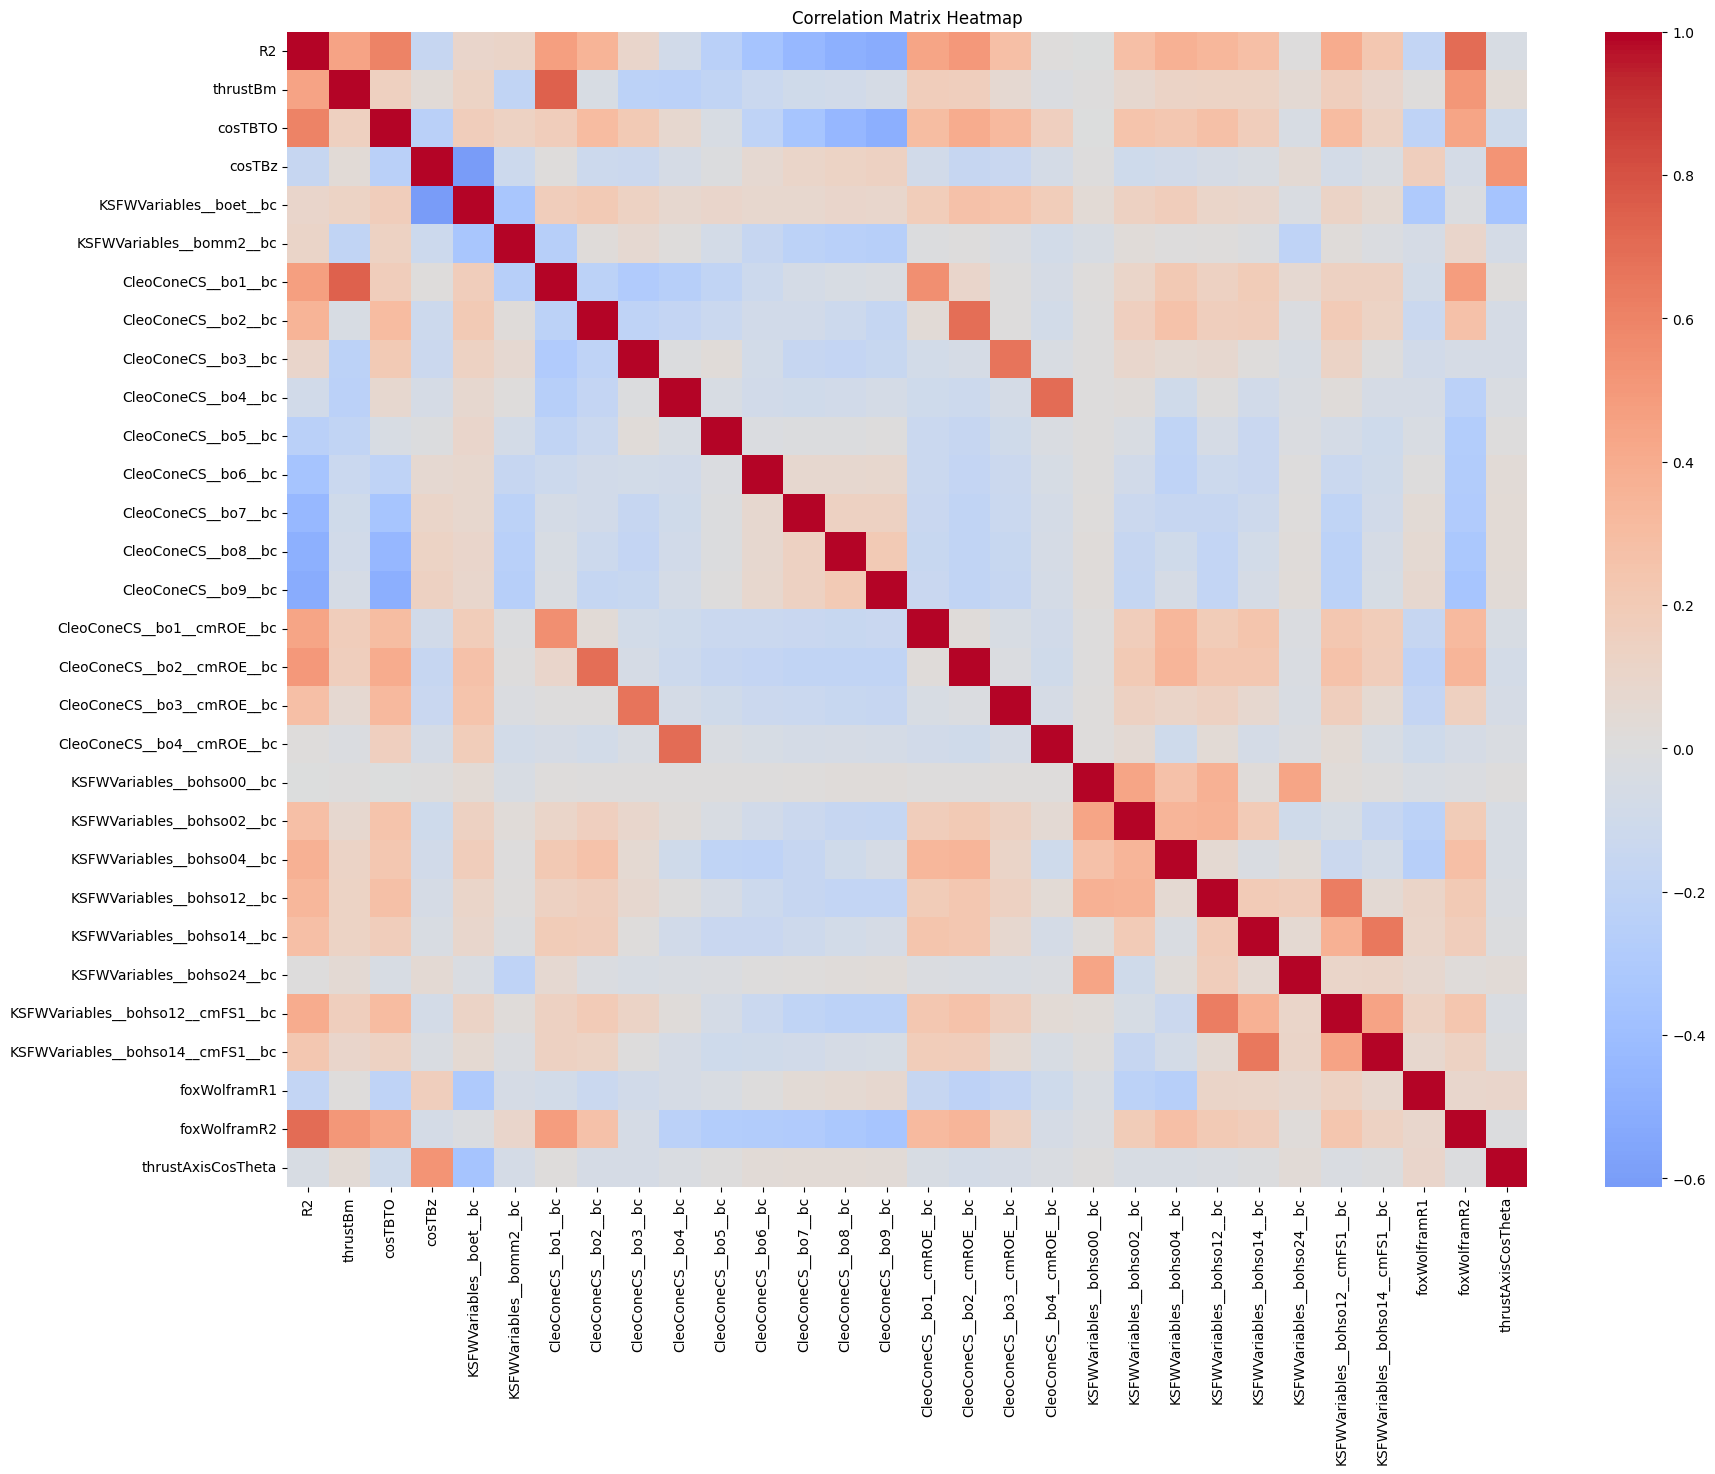

In [67]:
red_corr_matrix = reduced_features.corr()

plt.figure(figsize=(20, 15))
sns.heatmap(red_corr_matrix, cmap="coolwarm", center=0)
plt.title('Correlation Matrix Heatmap')
plt.show()

---------------

Some final checks with the data for cleaning

In [68]:
# check for missing values
print(df.isna().sum().to_string())

# check for duplicates
print(df.duplicated().sum())

# check if all values are int or float
for col in df.columns:
    if not pd.api.types.is_numeric_dtype(df[col]):
        print(f"Column {col} is not numeric")



index                                0
R2                                   0
thrustBm                             0
thrustOm                             0
cosTBTO                              0
cosTBz                               0
KSFWVariables__boet__bc              0
KSFWVariables__bomm2__bc             0
CleoConeCS__bo1__bc                  0
CleoConeCS__bo2__bc                  0
CleoConeCS__bo3__bc                  0
CleoConeCS__bo4__bc                  0
CleoConeCS__bo5__bc                  0
CleoConeCS__bo6__bc                  0
CleoConeCS__bo7__bc                  0
CleoConeCS__bo8__bc                  0
CleoConeCS__bo9__bc                  0
CleoConeCS__bo1__cmROE__bc           0
CleoConeCS__bo2__cmROE__bc           0
CleoConeCS__bo3__cmROE__bc           0
CleoConeCS__bo4__cmROE__bc           0
CleoConeCS__bo5__cmROE__bc           0
CleoConeCS__bo6__cmROE__bc           0
CleoConeCS__bo7__cmROE__bc           0
CleoConeCS__bo8__cmROE__bc           0
CleoConeCS__bo9__cmROE__b

In [69]:
print(df.size)
print(df.shape)

print(reduced_features.size)
print(reduced_features.shape)

4306966
(70606, 61)
2118180
(70606, 30)


In [70]:

full_df = pd.concat([reduced_features, df['type']], axis=1)
print(full_df.size)
print(full_df.shape)

2188786
(70606, 31)


----------------

### Analysing Data

In [71]:
types = df['type'].value_counts()

"""
BINARY CLASSIFICATION
0,1 = signal
2,3,4,5 = background

"""

print("Signal = ", types[0]+types[1])
print("Background = ", types[2]+types[3]+types[4]+types[5])

types


Signal =  35765
Background =  34841


type
1    35303
2    23333
3     8172
4     1879
5     1457
0      462
Name: count, dtype: int64

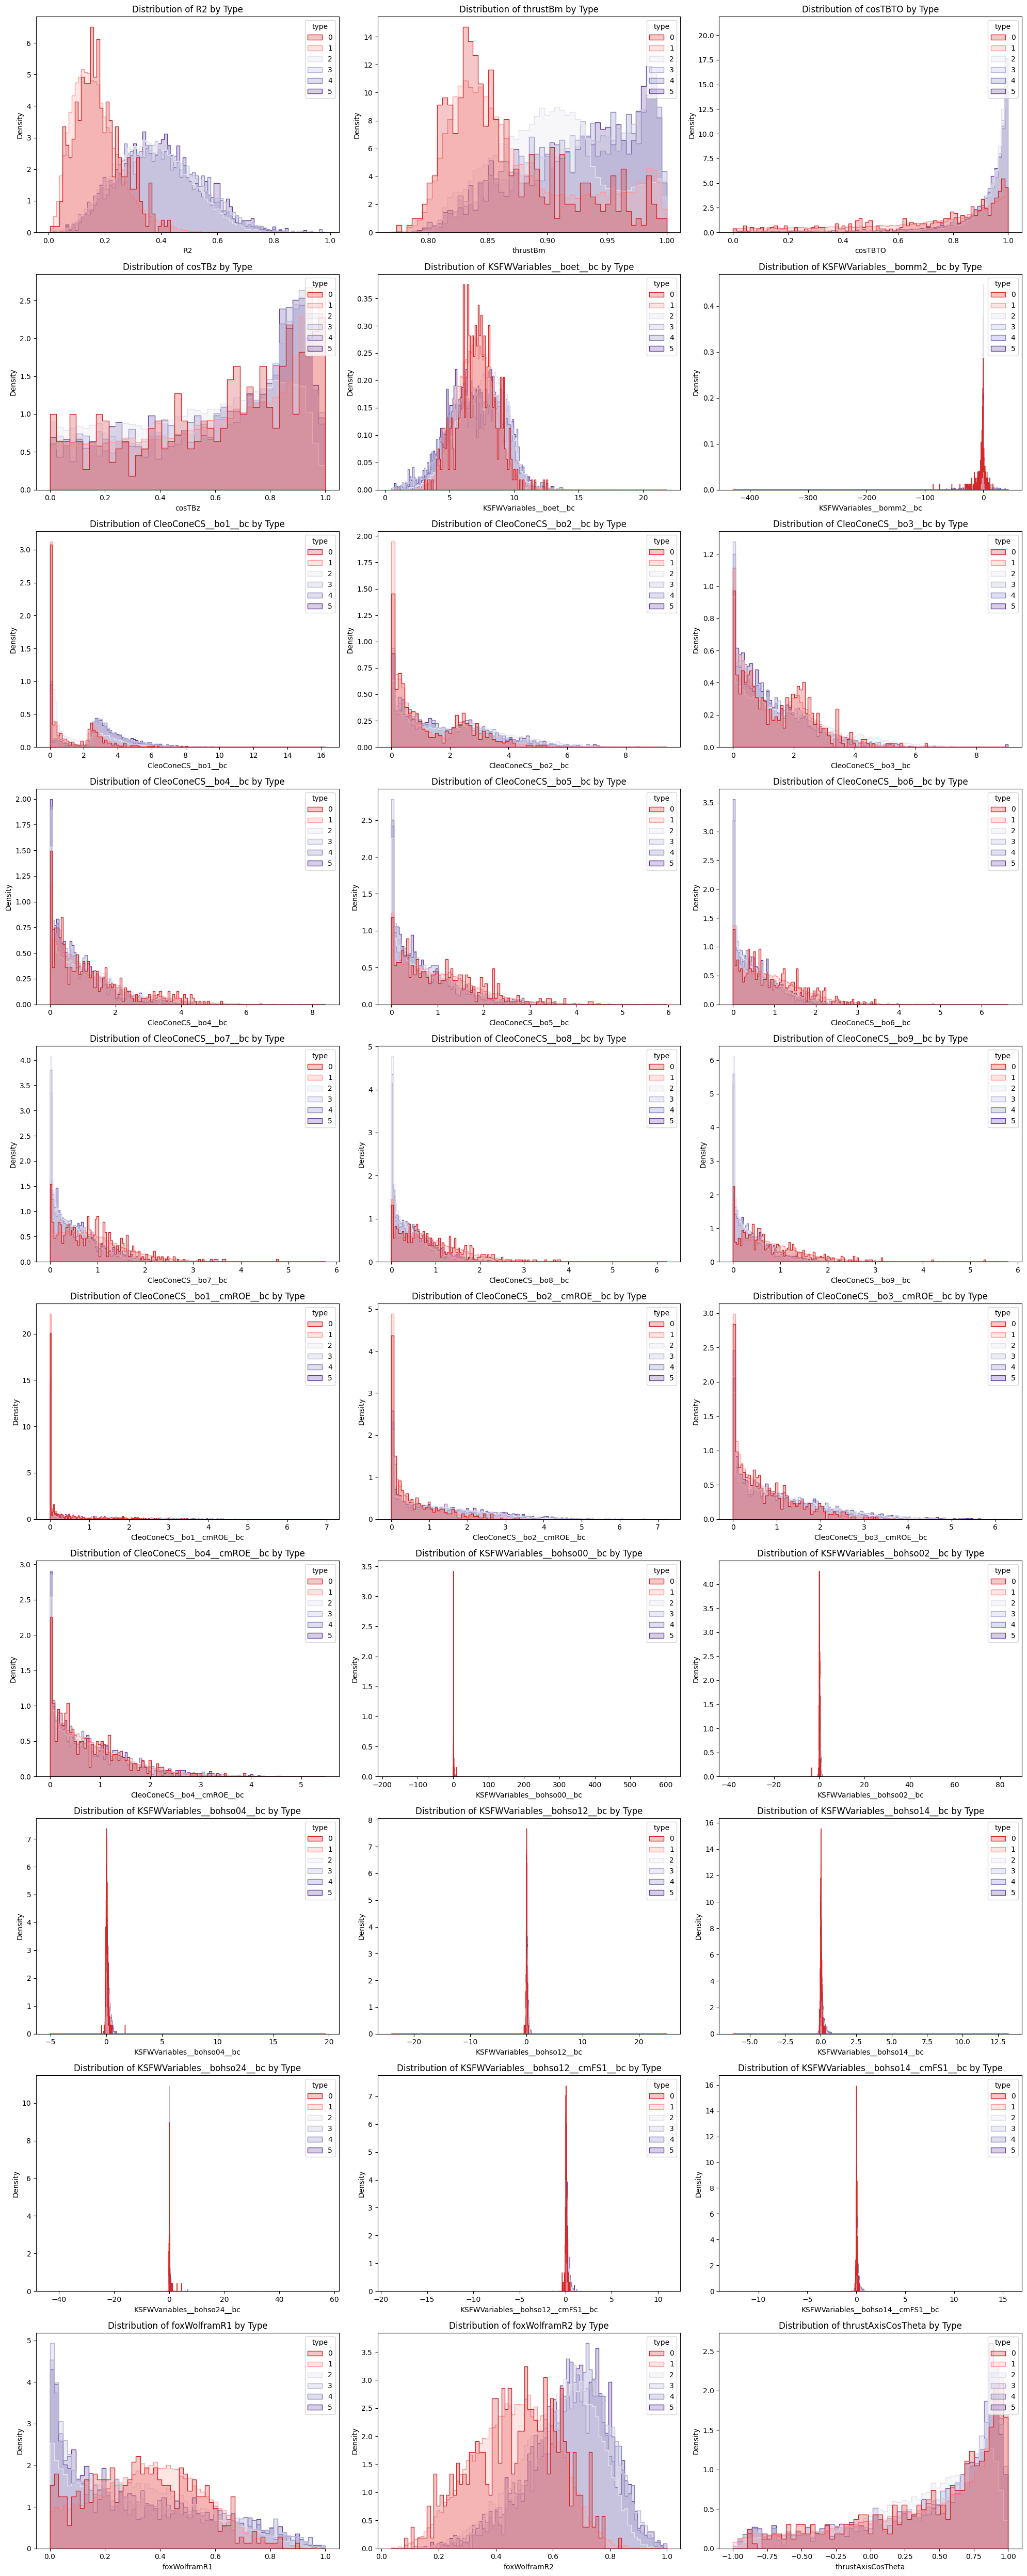

In [72]:
import seaborn as sns

# Warm reds for signal (0,1)
signal_colors = ["#d62728", "#ff9896"]   # deep red, soft salmon

# Purple gradient for background (2–5)
background_colors = sns.color_palette("Purples", n_colors=4)  # 4 shades of purple

# Combine into full palette
custom_palette = {
    0: signal_colors[0],   # type 0
    1: signal_colors[1],   # type 1
    2: background_colors[0],
    3: background_colors[1],
    4: background_colors[2],
    5: background_colors[3],
}



# num_features = reduced_features.shape[1]
# num_cols = 3
# num_rows = (num_features + num_cols - 1) // num_cols
# plt.figure(figsize=(20, num_rows * 5))
# for i, column in enumerate(reduced_features.columns):
#     plt.subplot(num_rows, num_cols, i + 1)
#     sns.histplot(data=full_df, x=column, hue='type', element='step', stat='density', common_norm=False)
#     plt.title(f'Distribution of {column} by Type')
# plt.tight_layout()
# plt.show()

# plt.savefig('feature_distributions_by_type.png')


num_features = reduced_features.shape[1]
num_cols = 3
num_rows = (num_features + num_cols - 1) // num_cols

plt.figure(figsize=(20, num_rows * 5))
for i, column in enumerate(reduced_features.columns):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.histplot(
        data=full_df,
        x=column,
        hue='type',
        element='step',
        stat='density',
        common_norm=False,
        palette=custom_palette
    )
    plt.title(f'Distribution of {column} by Type')

plt.tight_layout()
# plt.savefig("feature_distributions_by_type.png")
plt.show()


-----------------


# Starting Learning

### Split the data to train and test sets

In [73]:
from sklearn.model_selection import train_test_split

x = reduced_features
y = df['type'].apply(lambda x: 1 if x in [0, 1] else 0)  # Binary classification

"""
test_size: proportion of the dataset to include in the test split (30% here)
random_state: controls the shuffling applied to the data before applying the split
stratify: ensures that the class distribution is preserved in the train and test sets
"""

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42, stratify=y)

## Making a basic Decision Tree

In [74]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()

dtc.fit(x_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


##### Checking how good the tree is

In [75]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import plot_tree

y_pred = dtc.predict(x_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("---------------------------------------")
"""
[True-Postive, False-Negative]
[False-Positive, True-Negative]
"""

print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("---------------------------------------")

"""
precision = (true_positive) / (true_positive + false_positive)
recall = (true_positive) / (true_positive + false_negative)

f1-score = 2 * (precision * recall) / (precision + recall)
accuracy = (true_positive + true_negative) / (total_predictions)
"""

# map reduced_features columns to their importance
feature_importances = pd.Series(dtc.feature_importances_, index=reduced_features.columns).sort_values(ascending=False)
print("Feature Importances:")
print(feature_importances)

print("---------------------------------------")
# print accuracy of DT
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# visualize the tree

# plt.figure(figsize=(20, 10))
# plot_tree(dtc, feature_names=reduced_features.columns, class_names=['Background', 'Signal'], filled=True)
# plt.title('Decision Tree Visualization')
# plt.show()

Confusion Matrix:
[[8237 2215]
 [2228 8502]]
---------------------------------------

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.79      0.79     10452
           1       0.79      0.79      0.79     10730

    accuracy                           0.79     21182
   macro avg       0.79      0.79      0.79     21182
weighted avg       0.79      0.79      0.79     21182

---------------------------------------
Feature Importances:
R2                                   0.509571
CleoConeCS__bo1__bc                  0.038320
thrustBm                             0.034995
KSFWVariables__bomm2__bc             0.027212
CleoConeCS__bo1__cmROE__bc           0.023038
cosTBz                               0.021420
KSFWVariables__bohso24__bc           0.021331
foxWolframR1                         0.018524
KSFWVariables__boet__bc              0.017824
KSFWVariables__bohso02__bc           0.017813
KSFWVariables__bohso12__bc           0.0173

#### Trying a different DT config (was bad IGNORE)

Confusion Matrix for DT with different config:
[[8114 2338]
 [1517 9213]]
---------------------------------------

Classification Report for DT with different config:
              precision    recall  f1-score   support

           0       0.84      0.78      0.81     10452
           1       0.80      0.86      0.83     10730

    accuracy                           0.82     21182
   macro avg       0.82      0.82      0.82     21182
weighted avg       0.82      0.82      0.82     21182

---------------------------------------
Feature Importances for DT with different config:
R2                                   1.0
thrustBm                             0.0
foxWolframR2                         0.0
foxWolframR1                         0.0
KSFWVariables__bohso14__cmFS1__bc    0.0
KSFWVariables__bohso12__cmFS1__bc    0.0
KSFWVariables__bohso24__bc           0.0
KSFWVariables__bohso14__bc           0.0
KSFWVariables__bohso12__bc           0.0
KSFWVariables__bohso04__bc           0.0
KSFWVa

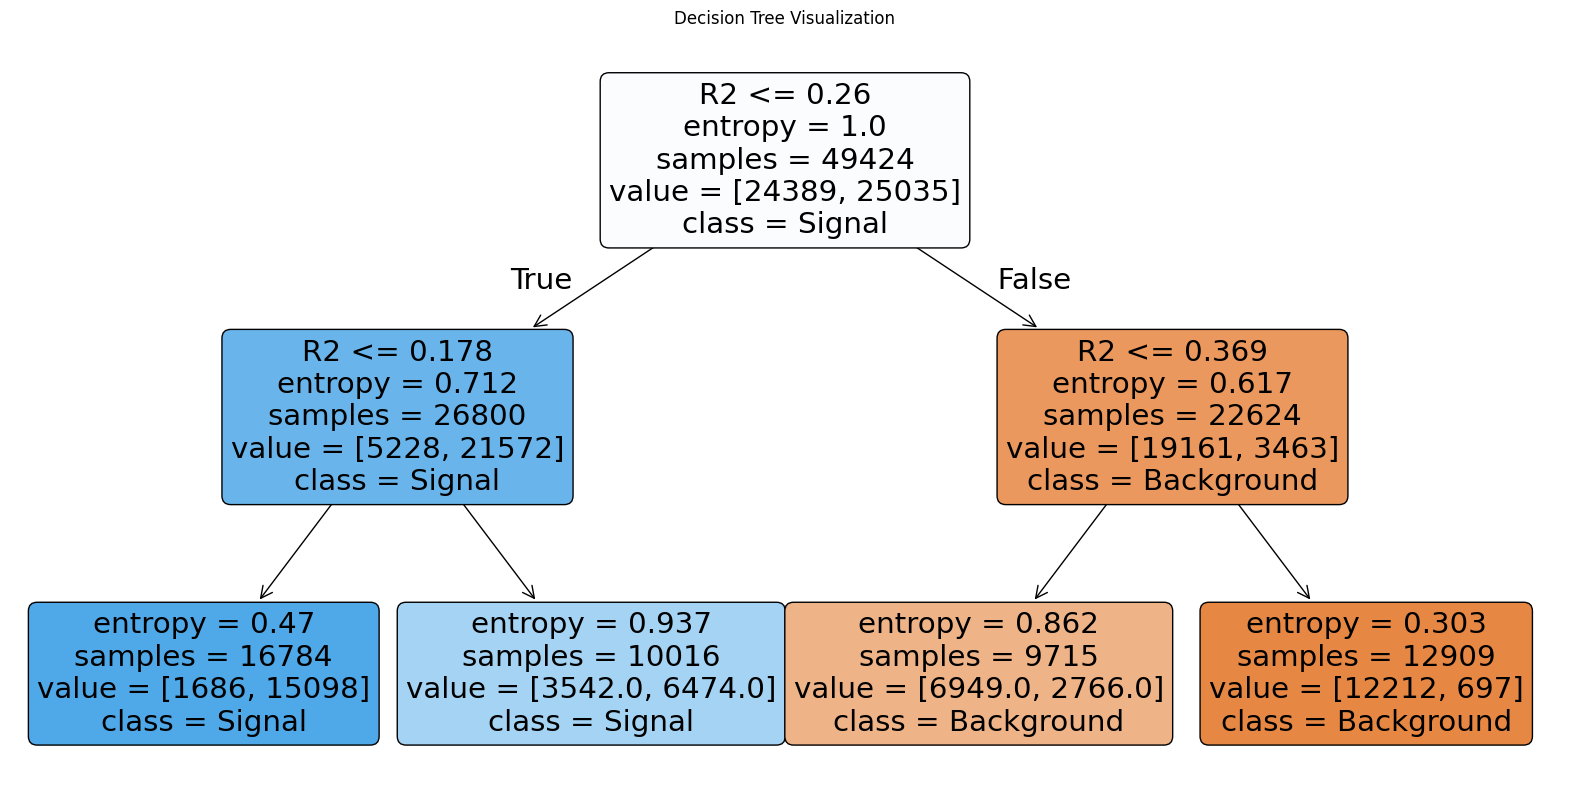

In [76]:
dtc2 = DecisionTreeClassifier(
    criterion='entropy', 
    ccp_alpha=0.02
    )
dtc2.fit(x_train, y_train)

y_pred2 = dtc2.predict(x_test)
print("Confusion Matrix for DT with different config:")
print(confusion_matrix(y_test, y_pred2))
print("---------------------------------------")
print("\nClassification Report for DT with different config:")
print(classification_report(y_test, y_pred2))
print("---------------------------------------")
print("Feature Importances for DT with different config:")
feature_importances2 = pd.Series(dtc2.feature_importances_, index=reduced_features.columns).sort_values(ascending=False)
print(feature_importances2)
print("---------------------------------------")


plt.figure(figsize=(20, 10))
plot_tree(dtc2, filled=True, feature_names=reduced_features.columns, class_names=['Background', 'Signal'], rounded=True)
plt.title('Decision Tree Visualization')
plt.show()


## Random Forest

In [77]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()

rfc.get_params()

rfc.fit(x_train, y_train)
y_pred_rf = rfc.predict(x_test)
print("Confusion Matrix for Random Forest:")
print(confusion_matrix(y_test, y_pred_rf))
print("---------------------------------------")
print("\nClassification Report for Random Forest:")
print(classification_report(y_test, y_pred_rf))
print("---------------------------------------")
print("Feature Importances for Random Forest:")
feature_importances_rf = pd.Series(rfc.feature_importances_, index=reduced_features.columns).sort_values(ascending=False)
print(feature_importances_rf)
print("---------------------------------------")
# print accuracy of RF
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy: {accuracy:.4f}")


Confusion Matrix for Random Forest:
[[8766 1686]
 [1345 9385]]
---------------------------------------

Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.87      0.84      0.85     10452
           1       0.85      0.87      0.86     10730

    accuracy                           0.86     21182
   macro avg       0.86      0.86      0.86     21182
weighted avg       0.86      0.86      0.86     21182

---------------------------------------
Feature Importances for Random Forest:
R2                                   0.219204
KSFWVariables__bohso02__bc           0.069203
foxWolframR2                         0.064655
cosTBTO                              0.057813
thrustBm                             0.051613
KSFWVariables__bohso12__bc           0.041929
KSFWVariables__bohso12__cmFS1__bc    0.040691
CleoConeCS__bo1__bc                  0.037274
CleoConeCS__bo9__bc                  0.030691
KSFWVariables__bohso04__bc         

## XGBoost

In [78]:
import xgboost as xgb

xgb_clf = xgb.XGBClassifier(
    eval_metric='logloss',
    n_estimators=500,
    learning_rate=0.1,
    max_depth=5,
    )
xgb_clf.fit(x_train, y_train)
y_pred_xgb = xgb_clf.predict(x_test)

print("Confusion Matrix for XGBoost:")
print(confusion_matrix(y_test, y_pred_xgb))
print("---------------------------------------")
print("\nClassification Report for XGBoost:")
print(classification_report(y_test, y_pred_xgb))
print("---------------------------------------")
print("Feature Importances for XGBoost:")
feature_importances_xgb = pd.Series(xgb_clf.feature_importances_, index=reduced_features.columns).sort_values(ascending=False)
print(feature_importances_xgb)
print("---------------------------------------")
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred_xgb)
print(f"Accuracy: {accuracy:.4f}")

Confusion Matrix for XGBoost:
[[8985 1467]
 [1130 9600]]
---------------------------------------

Classification Report for XGBoost:
              precision    recall  f1-score   support

           0       0.89      0.86      0.87     10452
           1       0.87      0.89      0.88     10730

    accuracy                           0.88     21182
   macro avg       0.88      0.88      0.88     21182
weighted avg       0.88      0.88      0.88     21182

---------------------------------------
Feature Importances for XGBoost:
R2                                   0.547127
CleoConeCS__bo1__bc                  0.037542
CleoConeCS__bo1__cmROE__bc           0.033202
thrustBm                             0.029007
KSFWVariables__bomm2__bc             0.025364
KSFWVariables__boet__bc              0.021504
cosTBz                               0.020391
KSFWVariables__bohso12__bc           0.019022
KSFWVariables__bohso24__bc           0.018191
CleoConeCS__bo2__bc                  0.017448
foxWolf

-------------


# Neural Network?

In [79]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

df = pd.read_csv(data)

X = df.drop(columns=['index', 'type'])
y_raw = df['type'].values

# Map to binary
# Map directly on the Series (pandas)
y = df["type"].map(lambda x: 0 if x in [0, 1] else 1).values



scaler = StandardScaler()
X = scaler.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Convert to tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

# Create datasets & loaders
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

### Defining the Neural Network

In [80]:
class Net(nn.Module):
    def __init__(self, input_dim):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(input_dim, 128)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(128, 64)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(64, 2)  # 2 classes (signal vs background)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu1(x)
        x = self.fc2(x)
        x = self.relu2(x)
        x = self.fc3(x)
        return x

model = Net(input_dim=X_train.shape[1])


### Training

In [81]:
criterion = nn.CrossEntropyLoss()  # since we have 2 classes
optimizer = optim.Adam(model.parameters(), lr=0.001)

epochs = 50

for epoch in range(epochs):
    model.train()
    total_loss = 0
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    print(f"Epoch {epoch+1}/{epochs}, Loss: {total_loss/len(train_loader):.4f}")


Epoch 1/50, Loss: 0.3663
Epoch 2/50, Loss: 0.3286
Epoch 2/50, Loss: 0.3286
Epoch 3/50, Loss: 0.3141
Epoch 3/50, Loss: 0.3141
Epoch 4/50, Loss: 0.3085
Epoch 4/50, Loss: 0.3085
Epoch 5/50, Loss: 0.2988
Epoch 5/50, Loss: 0.2988
Epoch 6/50, Loss: 0.2912
Epoch 6/50, Loss: 0.2912
Epoch 7/50, Loss: 0.2866
Epoch 7/50, Loss: 0.2866
Epoch 8/50, Loss: 0.2816
Epoch 8/50, Loss: 0.2816
Epoch 9/50, Loss: 0.2776
Epoch 9/50, Loss: 0.2776
Epoch 10/50, Loss: 0.2736
Epoch 10/50, Loss: 0.2736
Epoch 11/50, Loss: 0.2704
Epoch 11/50, Loss: 0.2704
Epoch 12/50, Loss: 0.2673
Epoch 12/50, Loss: 0.2673
Epoch 13/50, Loss: 0.2627
Epoch 13/50, Loss: 0.2627
Epoch 14/50, Loss: 0.2599
Epoch 14/50, Loss: 0.2599
Epoch 15/50, Loss: 0.2575
Epoch 15/50, Loss: 0.2575
Epoch 16/50, Loss: 0.2554
Epoch 16/50, Loss: 0.2554
Epoch 17/50, Loss: 0.2516
Epoch 17/50, Loss: 0.2516
Epoch 18/50, Loss: 0.2475
Epoch 18/50, Loss: 0.2475
Epoch 19/50, Loss: 0.2442
Epoch 19/50, Loss: 0.2442
Epoch 20/50, Loss: 0.2432
Epoch 20/50, Loss: 0.2432
Epo

In [82]:
model.eval()
y_pred = []
y_true = []

with torch.no_grad():
    for X_batch, y_batch in test_loader:
        outputs = model(X_batch)
        _, preds = torch.max(outputs, 1)
        y_pred.extend(preds.numpy())
        y_true.extend(y_batch.numpy())

print("Confusion Matrix:")
print(confusion_matrix(y_true, y_pred))
print("\nClassification Report:")
print(classification_report(y_true, y_pred, digits=4))

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_true, y_pred)
print(f"Accuracy: {accuracy:.4f}")



Confusion Matrix:
[[9234 1496]
 [1508 8944]]

Classification Report:
              precision    recall  f1-score   support

           0     0.8596    0.8606    0.8601     10730
           1     0.8567    0.8557    0.8562     10452

    accuracy                         0.8582     21182
   macro avg     0.8582    0.8581    0.8582     21182
weighted avg     0.8582    0.8582    0.8582     21182

Accuracy: 0.8582


In [84]:
# Compare accuracy of DT, RF, XGBoost, NN using previously calculated values
models = ['Decision Tree', 'Random Forest', 'XGBoost', 'Neural Network']
accuracies = []

# Use previously calculated accuracy variables
accuracies.append(dt_accuracy)      # Decision Tree
accuracies.append(rf_accuracy)      # Random Forest
accuracies.append(xgb_accuracy)     # XGBoost
accuracies.append(nn_accuracy)      # Neural Network

plt.figure(figsize=(8, 6))
plt.bar(models, accuracies, color=['#1f77b4', '#2ca02c', '#ff7f0e', '#9467bd'])
plt.ylim(0, 1)
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
for i, v in enumerate(accuracies):
    plt.text(i, v + 0.01, f'{v:.4f}', ha='center', fontweight='bold')
plt.show()


NameError: name 'dt_accuracy' is not defined